In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston

In [3]:
# Cargamos la base de datos
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# El objetivo que perseguimos es predecir el valor de la vivienda en base al número de habitaciones 
# La columna 5 del dataset es el número de habitaciones por casa.
X = boston.data[:,5]
Y = boston.target

Vamos a realizar una regresión lineal de forma que podamos predecir el precio de una casa en función del número de habitaciones. Para ello hay que minimizar el error cuadrático medio (Mínimos Cuadrados Ordinarios MCO). Su ecuación es la siguinte:
$\beta = (X^{T}X)^{-1}X^{T}Y$

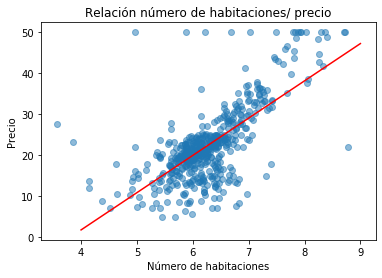

In [5]:
# Vamos a visualizar la gráfica de nuestros datos (X = número de habitaciones, Y = precio)
# Alpha representa la transparencia de los puntos
plt.scatter(X, Y, alpha = 0.5)
plt.xlabel('Número de habitaciones')
plt.ylabel('Precio')
plt.title('Relación número de habitaciones/ precio')
# Añadimos una columna de 1s para poder realizar de forma corecta el cálculo de Mínimos Cuadrados Ordinarios
# T es para obtener su traspuesta, es para tener matriz de la forma que nos interesa para hacer los cálculos
X = np.array([np.ones(506), X]).T
# Empezamos a implementar la ecuación de MCO
# En python la multiplicación matricial se realiza mediate el operador @, X.T es la traspuesta de X
B = np.linalg.inv(X.T @ X) @ X.T @ Y
# Vamos a dibujar la línea de regresión. Para dibujar una recta se necesitan dos puntos. En este caso, nosotros
# queremos adivinar el precio de la vivienda a partir del número de habitaciones. Nosotros conocemos el número de 
# habitaciones y la regresión calculada mediante MCO calcula el precio estimado. Como entrada tenemos los puntos
# (X = 4, Y = ?) y (X = 9, Y = ?). Mediante la ecuación MCO calculamos las ?
plt.plot([4, 9], [B[0] + B[1] * 4, B[0] + B[1] * 9], c='red')
plt.show()